# Python Homework 5

**Release date:** Friday, Feb 7th <br>
**Due date:** Friday, **Feb 21st**, 11:59 p.m. via GauchoSpace

**Instruction:** Please upload your jupyter notebook on GauchoSpace with filename "PythonHW5_YOURPERMNUMBER.ipynb".

__Background:__ The purpose of this python homework is to explore the so-called __Arcsine Laws__ numerically. They describe a number of interesting results by relating path properties of the simple symmetric random walk to the __arcsine distribution__ (see also __Lecture 12__!!).

Given a <b>simple symmetric random walk</b> $(S_n)_{n\geq 0}$ with $S_0 =0$, we define the following random variables:
* The total number of periods from $0$ to $2N$ the random walk spends above zero: 

$$C_{2N}= \vert \{ n \in \{ 1,\dots , 2N \} : S_n > 0 \}\vert. $$

* The time of the last visit to $0$ before time $2N$: 

$$L_{2N} = \max \{ 0 \leq n \leq  2N : S_n = 0 \}.$$

* The time when the random walk reaches its maximum value between time $0$ and $2N$: 

$$M_{2N} = \operatorname{argmax} \{ S_n : 0 \leq n \leq 2N \}.$$ 

As usual, we start with loading some packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import arcsine

## Problem 1 (2 Points)

1. Write a function <tt>randomWalk(...)</tt> which simulates one <i>path</i> (or <i>trajectory</i>) of a simple symmetric random walk with 2N time steps (i.e. from 0,1,2,...,2N) starting at $S_0=0$.

Input: 
* <tt>lengthOfRandomWalk = 2N</tt> 

Output:
* <tt>samplePath</tt>: Array of length 2N+1 with the entire path of the random walk on 0,1,2,...,2N


In [2]:
import random

def randomWalk(n):
    
    random.randint(0,1)
    possiblemoves = [-1,1] #for simple random walk along integer axis
    samplePath = []
    samplePath.append(0)
    for i in range(2*n):
        samplePath.append((samplePath[(i)])+ (possiblemoves[random.randint(0,1)]))
    
    return samplePath

In [3]:
## TEST YOUR FUNCTION HERE
print(randomWalk(100))

[0, 1, 2, 3, 2, 3, 2, 1, 2, 3, 4, 5, 6, 5, 6, 5, 4, 3, 2, 1, 2, 1, 0, 1, 0, -1, -2, -1, 0, -1, -2, -3, -2, -3, -2, -1, -2, -3, -2, -1, -2, -3, -2, -1, 0, -1, 0, 1, 2, 1, 2, 1, 0, -1, -2, -3, -2, -1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, -1, 0, -1, -2, -1, 0, 1, 0, -1, 0, 1, 0, -1, 0, 1, 2, 1, 0, -1, -2, -1, 0, 1, 0, -1, -2, -3, -4, -3, -2, -3, -4, -5, -4, -3, -2, -1, 0, -1, -2, -3, -2, -1, -2, -1, 0, -1, -2, -1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, -1, 0, -1, 0, 1, 2, 1, 2, 3, 2, 1, 0, -1, 0, -1, 0, -1, 0, 1, 0, 1, 2, 3, 4, 5, 4, 5, 6, 7, 6, 7, 6, 7, 6, 7, 6, 5, 6, 7, 6, 5, 4, 5, 4, 3, 2, 1, 0, 1, 2, 1, 2, 1, 0, -1, 0]


2. Plot the trajectory of the random walk you simulated in 1.)

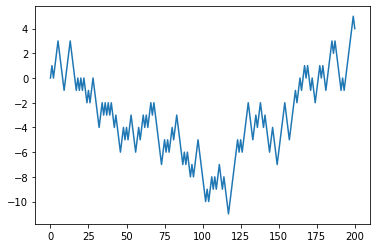

In [4]:
plt.plot(randomWalk(100))
plt.show()

## Problem 2 (6 points)

Write __three__ functions which take a path (= realization) of the random walk as an input and then compute a value (= realization) of the random variables $C_{2N}, L_{2N}, M_{2N}$, respectively, as defined above.

__1. Function:__ <tt>timeAboveZero(...)</tt>

Input: 
* <tt>path</tt>: Realization of the random walk from the function <tt>randomWalk(2N)</tt> 

Output:
* <tt>result</tt>: Realization of the random variable $C_{2N}$

In [5]:
def timeAboveZero(path):
    result = 0
    for i in path:
        if int(i) > 0:
            result += 1

    return result

In [6]:
## TEST YOUR FUNCTION HERE
path = randomWalk(20)
print(path)
timeAboveZero(path)

[0, -1, -2, -3, -4, -3, -2, -3, -4, -5, -6, -5, -4, -3, -2, -1, 0, 1, 0, 1, 0, 1, 0, -1, -2, -3, -4, -5, -6, -5, -4, -3, -2, -1, 0, 1, 0, 1, 2, 3, 2]


8

__2. Function:__ <tt>TimeOfLastVisitOfZero(...)</tt>

Input: 
* <tt>path</tt>: Realization of the random walk from the function <tt>randomWalk(2N)</tt> 

Output:
* <tt>result</tt>: Realization of the random variable $L_{2N}$

In [7]:
def TimeOfLastVisitOfZero(path):
    
    lastVisit = np.amax(np.where(np.array(path) == 0)[0])
        
    return lastVisit  

In [8]:
## TEST YOUR FUNCTION HERE
path = randomWalk(20)
print(path)
TimeOfLastVisitOfZero(path)

[0, -1, -2, -3, -4, -3, -4, -3, -2, -3, -2, -3, -2, -3, -4, -5, -4, -3, -4, -3, -2, -1, -2, -1, -2, -1, 0, 1, 0, 1, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 4]


28

__3. Function:__ <tt>timeHitMax(...)</tt>

Input: 
* <tt>path</tt>: Realization of the random walk from the function <tt>randomWalk(2N)</tt> 

Output:
* <tt>result</tt>: Realization of the random variable $M_{2N}$

In [9]:
def timeHitMax(randomWalk):
    
    result = randomWalk[np.argmax(randomWalk)]

    return result 

In [10]:
## Test your function here
path = randomWalk(20)
print(path)
timeHitMax(path)

[0, -1, 0, -1, -2, -1, 0, -1, 0, -1, 0, -1, 0, 1, 2, 3, 2, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 5, 6, 5, 6, 5, 6, 5, 6, 5, 4, 3, 2, 1, 0]


6

## Problem 3 (2 Points)

Random Walk theory provides us with the following interesting asymptotic statements (cf. __Lecture 12__):

$$\lim_{N\rightarrow \infty} \mathbb{P} \left[ \frac{C_{2N}}{2N} \leq x\right] =\frac{2}{\pi} \arcsin(\sqrt{x})$$

$$\lim_{N\rightarrow \infty} \mathbb{P} \left[ \frac{L_{2N}}{2N} \leq x\right] =\frac{2}{\pi} \arcsin(\sqrt{x})$$

$$\lim_{N\rightarrow \infty} \mathbb{P} \left[ \frac{M_{2N}}{2N} \leq x\right] =\frac{2}{\pi} \arcsin(\sqrt{x})$$

We say that the random variables $C_{2N}/2N, L_{2N}/2N, M_{2N}/2N$ <b>converge in distribution</b> to the Arcsine Distribution.

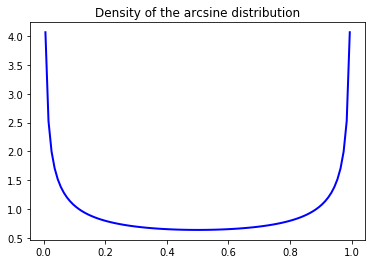

In [11]:
## A PLOT OF THE ARCSINE DENSITY
x = np.linspace(arcsine.ppf(0.05), arcsine.ppf(0.95), 100)
plt.title("Density of the arcsine distribution")
plt.plot(x, arcsine.pdf(x), linewidth=2, color='b')
plt.show()

For $2N = 1000$ sample 10,000 realizations of each of the random variables $C_{2N}/2N, L_{2N}/2N,$ and $M_{2N}/2N$, respectively by using your functions above. Display a normalized histogram for all three simulations, along with the probability density function of the arcsine distribution, to check the above facts numerically! 

In [12]:
c = []
l = []
m = []
for i in range(10000):
    path = randomWalk(1000)
    c.append(timeAboveZero(path)/(1000))
    l.append(TimeOfLastVisitOfZero(path)/(1000))
    m.append(timeHitMax(path)/(1000))

In [13]:
(timeAboveZero(path)/(1000))

0.196

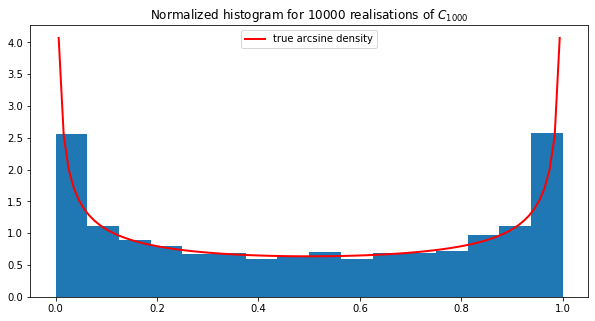

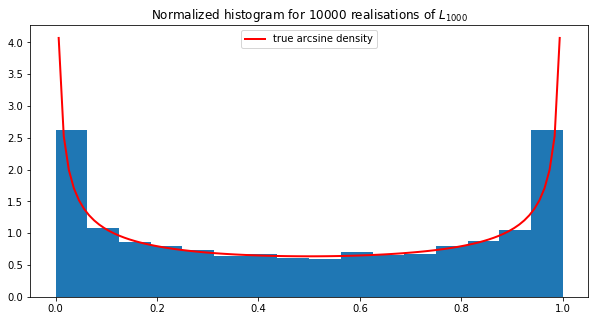

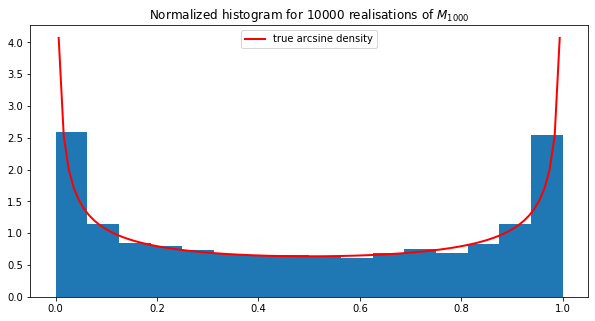

In [14]:
# COMPLETE/MODIFY THE PLOT COMMANDS ACCORDINGLY

N = 500
M = 10000


c = arcsine.rvs(size=10000)  # This has to be replaced by the simulated values for C_2N !!!

plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 10000 realisations of $C_{1000}$")
plt.hist(c, bins='auto', density='True')
plt.plot(x, arcsine.pdf(x), linewidth=2, color='r', label="true arcsine density")
plt.legend()


l = arcsine.rvs(size=10000)  # This has to be replaced by the corresponding simulated values for L_2N !!!

plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 10000 realisations of $L_{1000}$")
plt.hist(l, bins='auto', density='True')
plt.plot(x, arcsine.pdf(x), linewidth=2, color='r', label="true arcsine density")
plt.legend()


m = arcsine.rvs(size=10000)  # This has to be replaced by the corresponding simulated values for M_2N !!!

plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 10000 realisations of $M_{1000}$")
plt.hist(m, bins='auto', density='True')
plt.plot(x, arcsine.pdf(x), linewidth=2, color='r', label="true arcsine density")
plt.legend()

plt.show()